# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import os
import urllib.request
import zipfile

SOURCE_URL = 'https://s3-us-west-1.amazonaws.com/udacity-selfdrivingcar/traffic-signs-data.zip'
DATA_DIR = 'data'

def download_data_set(url, directory, filename):
    if not os.path.isdir(directory):
        os.makedirs(directory)
    
    filepath = os.path.join(directory, filename)

    if not os.path.isfile(filepath):
        print('Downloading data set...')
        urllib.request.urlretrieve(url, filepath)
        filestat = os.stat(filepath)
        size = filestat.st_size
        print('Successfully downloaded {} ({} bytes)'.format(filename, size, 'bytes.'))
    else:
        print('Dataset {} already downloaded'.format(filename))

    return filepath

def read_data_set(url = SOURCE_URL, destination = DATA_DIR):
    filepath = download_data_set(url, destination, 'traffic-signs-data.zip')
    
    train_path = os.path.join(destination, 'train.p')
    valid_path = os.path.join(destination, 'valid.p')
    test_path  = os.path.join(destination, 'test.p')
    
    if not all(map(os.path.isfile, [train_path, valid_path, test_path])):
        print('Extracting pickle files...')
        compressed_file = zipfile.ZipFile(filepath)
        compressed_file.extractall(destination)
        pickle_files = list(filter(lambda name: name.endswith('.p'), os.listdir(destination)))
        print('Successfully extracted ', pickle_files)
    
    return train_path, valid_path, test_path

# Loads the training, validation and testing files
training_file, validation_file, testing_file = read_data_set()

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

Dataset traffic-signs-data.zip already downloaded


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
import numpy as np

### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [54]:
import pandas
import matplotlib.pyplot as plt

%matplotlib inline

def read_labels_map(filepath = 'signnames.csv'):
    return pandas.read_csv(filepath).as_matrix()

labels_map = read_labels_map()

def plot_images(x, y = None, indices = None, cols = 5):
    
    if indices is None:
        indices = range(len(x))
    
    rows = np.ceil(len(indices) / cols).astype('uint32')
    
    plt.figure(figsize = (15, rows * 2))
    plt.subplots_adjust(hspace=0.4, wspace=0.4)
    
    for i, index in enumerate(indices):
        plt.subplot(rows, cols, i + 1)
        if y is not None:
            plt.title(y[index], fontsize=14, fontweight='bold')
            plt.text(16, 34, labels_map[y[index]][1],
                verticalalignment='top', 
                horizontalalignment='center',
                color='black', fontsize=10)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(x[index])

    plt.show()

def plot_random_samples(x, y, num = 5, from_index = 0):
    
    samples = np.random.randint(from_index, len(x), size=num)
    
    plot_images(x, y, samples)
    
    return samples

Let us plot some random images from the **training set**:

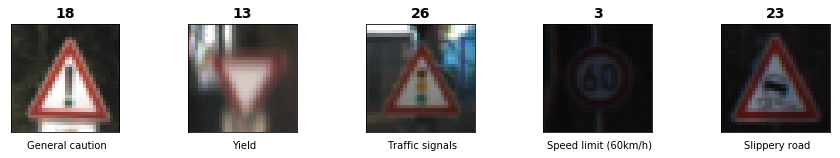

In [6]:
_ = plot_random_samples(X_train, y_train)

Now let us have a look at the **validation** and **testing** set:

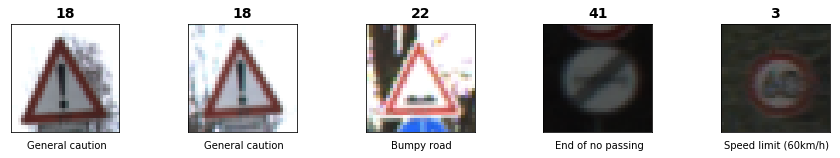

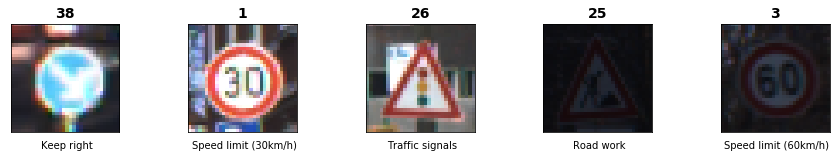

In [7]:
_ = plot_random_samples(X_valid, y_valid)
_ = plot_random_samples(X_test, y_test)

Looking at the images we can notice that there is a brightness shift, we may want to normalize the images or play around with the diffferent color channels in a pre-processing step.

Let us now try to plot the distribution on a bar chart:

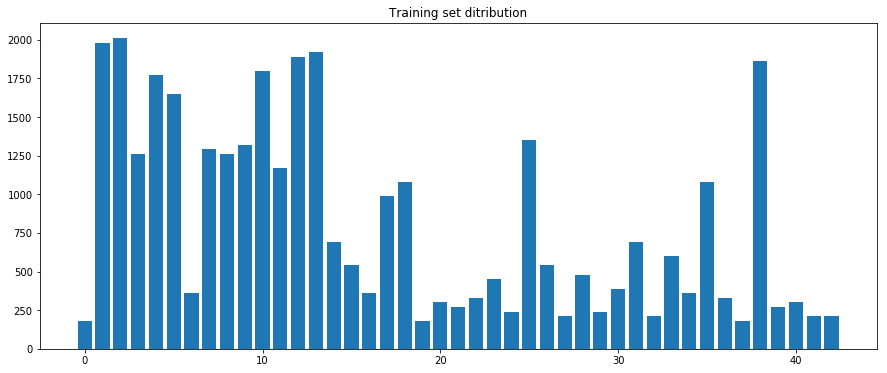

In [8]:
def plot_distribution(y, title, stack = None):
    classes, count = np.unique(y, return_counts=True)
    plt.figure(figsize = (15, 6))
    plt.title(title)
    plt.bar(classes, count)
    if stack is not None:
        for y_opt in stack:
            classes_opt, count_opt = np.unique(y_opt, return_counts = True)
            plt.bar(classes_opt, count_opt)
    plt.show()

plot_distribution(y_train, 'Training set ditribution')
    

The ditribution of the classes is not uniform and several contains very few examples, this may lead to poor perfomance on any model. Already from this we could think of augmenting the dataset. Let us have a look at the distribution of the validation and testing set:

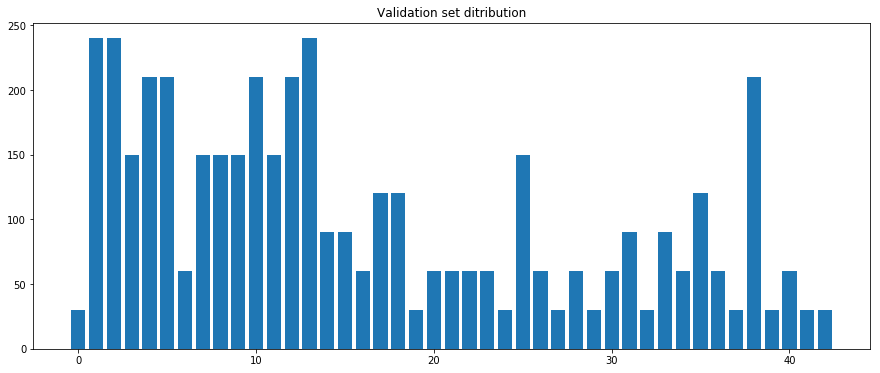

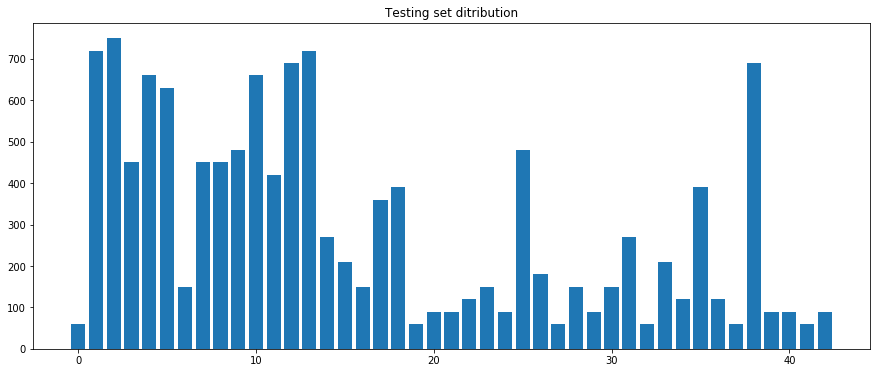

In [9]:
plot_distribution(y_valid, 'Validation set ditribution')
plot_distribution(y_test, 'Testing set ditribution')

We can notice that the distribution of the samples is the same among the various datasets, this is good news especially for the validation and test dataset that should be drawn from the same distribution.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

#### Pre-processing

We can start with a minimal normalization and preprocessing and come back later if needed. We can notice that the images have a strong shift in brightness. We can apply a histogram equalization to fix the contrast, from https://docs.opencv.org/3.1.0/d5/daf/tutorial_py_histogram_equalization.html we can try using Contrast Limited Adaptive Histogram Equalization (CLAHE) that seems to yield better results:

In [10]:
import cv2
from tqdm import tqdm
from sklearn.utils import shuffle

# Contrast Limited Adaptive Histogram Equalization
CLAHE = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4,4))

def normalize_data(X, a = -.5, b = .5, X_min = 0, X_max = 255):
    return a + ((X - X_min) * (b - a)) / (X_max - X_min)
    #return (X - 128.)/128.
    
def hist_equalize(img, clahe = None):
    # Convert to LAB color space
    converted = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    
    # Equalize the histogram on the L channel only
    converted[:,:,0] = cv2.equalizeHist(converted[:,:,0]) if clahe is None else clahe.apply(converted[:,:,0])

    return cv2.cvtColor(converted, cv2.COLOR_LAB2RGB)

def preprocess_image(img):
    img = hist_equalize(img, clahe = CLAHE)
    return img

def preprocess_data(X, y, normalize = True, shuffle_data = True):
    images = []
    
    for img in tqdm(X, unit=' images', desc='Pre-processing'):
        images.append(preprocess_image(img))
    
    X = np.array(images)
    
    if normalize:
        X = normalize_data(X)

    if shuffle_data:
        X, y = shuffle(X, y)
    
    return X, y

X_train_processed, y_train_processed = preprocess_data(X_train, y_train, normalize = False, shuffle_data = False)

Pre-processing: 100%|██████████| 34799/34799 [00:03<00:00, 11205.78 images/s]


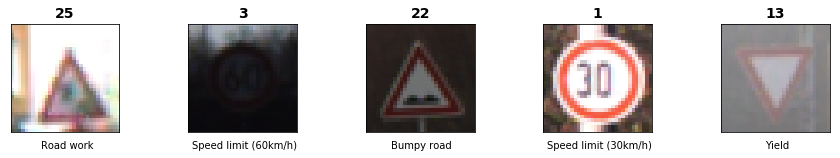

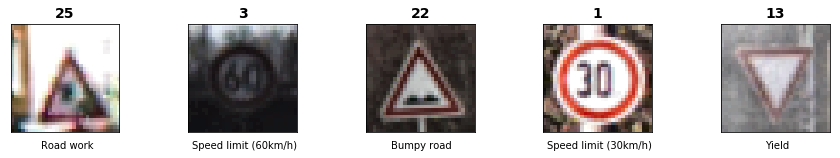

In [11]:
indices = plot_random_samples(X_train, y_train)

plot_images(X_train_processed, y_train_processed, indices)

#### Data Augmentation

From the previous section we can notice that the distribution of the various classes in the dataset is not uniform and there are classes with very few examples. We can notice from the images in the dataset that some of can be mirrored retaining the same class (e.g. yield, stop etc.), while others can be mirrored but their class is swaped (E.g. keep left -> keep right etc). As a first step we can therefore simply mirror horizontally those classes and add it back to the dataset:

In [12]:
def mirror_images(X, y):
    mirror_map = {
        11: 11,
        12: 12,
        13: 13,
        15: 15,
        17: 17,
        18: 18,
        19: 20,
        20: 19,
        22: 22,
        26: 26,
        30: 30,
        33: 34,
        34: 33,
        35: 35,
        36: 37,
        37: 36, 
        38: 39,
        39: 38
    }
    
    classes, count = np.unique(y, return_counts = True)
    
    mean = np.ceil(np.mean(count)).astype('uint32')
    
    additional_x = []
    additional_y = []
    
    for cls in tqdm(classes, unit=' classes', desc='Mirroring'):
        
        images_in_class = np.where(y == cls)[0]
        if cls in mirror_map:
            mirror_cls = mirror_map[cls]
            mirrored_h = X[images_in_class][:, :, ::-1, :]
            mirrored_h = mirrored_h[0:mean]
            additional_x.extend(mirrored_h)
            additional_y.extend(np.full((len(mirrored_h)), mirror_cls, dtype = int))

    additional_x = np.array(additional_x)
    additional_y = np.array(additional_y)
        
    X = np.concatenate((X, additional_x), axis = 0)
    y = np.concatenate((y, additional_y), axis = 0)
    
    return X, y
    
X_train_mirrored, y_train_mirrored = mirror_images(X_train, y_train)

print("Total number of samples: {} (Originally: {})".format(len(X_train_mirrored), len(X_train)))


Mirroring: 100%|██████████| 43/43 [00:00<00:00, 2846.15 classes/s]

Total number of samples: 44488 (Originally: 34799)


With this we gained a fair amount of new samples basically for free, note that we mirrored only horizontally to be careful as we want to avoid a wrong generalization of the model.

Next we can plot the distribution again of the augmented dataset with the mirrored images:

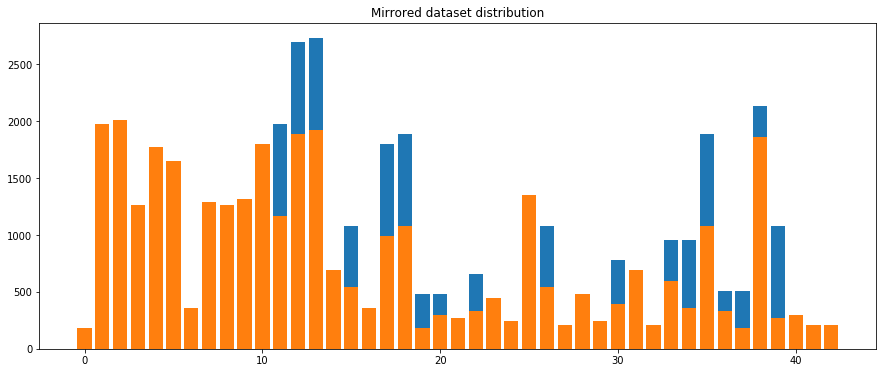

In [13]:
plot_distribution(y_train_mirrored, 'Mirrored dataset distribution', [y_train])

The dataset is still not uniform, we further augment the training set generating random geometric transformations on the images:

In [14]:
import cv2

def scale_image(img, x_factor=0.85, y_factor=0.85, border = 5):
    row_i, col_i, _ = img.shape
    
    img = cv2.resize(img, None, fx = x_factor, fy = y_factor)
    
    img = cv2.copyMakeBorder(img, border, border, border, border, cv2.BORDER_REPLICATE)
    
    row, col, _ = img.shape
    
    row_gap = round((row - row_i) / 2)
    col_gap = round((col - col_i) / 2)
    
    return img[row_gap:row_i + row_gap, col_gap:col_i + col_gap]

def translate_image(img, x = 5, y = 5, border = 5):
    img = cv2.copyMakeBorder(img, border, border, border, border, cv2.BORDER_REPLICATE)
    
    row, col, _ = img.shape

    trans_m = np.float32([[1, 0, x],[0, 1, y]])
    
    img = cv2.warpAffine(img, trans_m, (col, row))
    
    return img[border:row - border, border:col - border]

def transform_perspective(img, delta = [2, 2, 2, 2], border = 5):
    img = cv2.copyMakeBorder(img, border, border, border, border, cv2.BORDER_REPLICATE)
    
    row, col, _ = img.shape
    
    # Top left
    x1 = delta[0]
    y1 = delta[0]
    # Top right
    x2 = col - delta[1]
    y2 = delta[1]
    # Bottom left
    x3 = delta[2]
    y3 = row - delta[2]
    # Bottom right
    x4 = col - delta[3]
    y4 = row - delta[3]
    
    pts1 = np.float32([[x1, y1],[x2, y2],[x3, y3],[x4, y4]])
    pts2 = np.float32([[0, 0],[col, 0],[0, row],[col, row]])
    
    persp_m = cv2.getPerspectiveTransform(pts1,pts2)
    
    img = cv2.warpPerspective(img, persp_m , (row, col))
    
    return img[border:row - border, border:col - border]

def rotate_image(img, angle = 15, border = 5):
    img = cv2.copyMakeBorder(img, border, border, border, border, cv2.BORDER_REPLICATE)

    row, col, _ = img.shape

    rot_m = cv2.getRotationMatrix2D((row / 2, col / 2), angle, 1)

    img = cv2.warpAffine(img, rot_m, (col, row))
    
    return img[border:row - border, border:col - border]

def adjust_gamma(img, gamma = 1.0):
    invGamma = 1.0 / gamma
    
    gamma_m = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")

    return cv2.LUT(img, gamma_m)

def random_transform(img):
    mask = np.random.randint(0, 2, [1, 5])[0]
    
    if np.sum(mask) == 0:
        mask[np.random.randint(5)] = 1

    if mask[0] == 1:
        img = scale_image(img, x_factor = np.random.uniform(0.85, 1.15), y_factor = np.random.uniform(0.85, 1.15))
    if mask[1] == 1:
        img = translate_image(img, x = np.random.randint(-3, 3), y = np.random.randint(-2, 2))
    if mask[2] == 1:
        img = adjust_gamma(img, gamma = np.random.uniform(0.8, 1.2))
    if mask[3] == 1:
        img = rotate_image(img, angle = np.random.uniform(-15, 15))
    if mask[4] == 1:
        img = transform_perspective(img, [np.random.uniform(-7, 7) for i in range(4)])
        
    return img

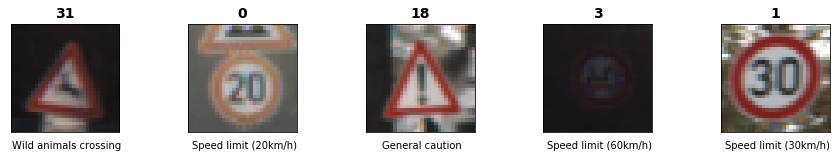

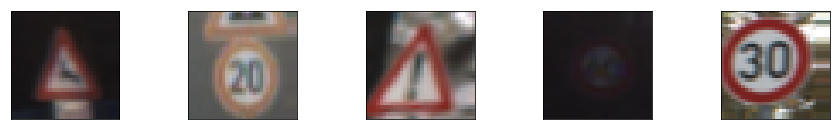

In [15]:
indices = plot_random_samples(X_train, y_train)

transformed_images = []

for i in indices:
    transformed_images.append(random_transform(X_train[i]))
    
plot_images(transformed_images)

We can therefore continue generating new images for the under represented classes:

In [16]:
def augment_dataset(X, y):
    
    additional_x = []
    additional_y = []
    
    classes, count = np.unique(y, return_counts = True)
    
    min_desired = np.max(count)
    
    for cls in tqdm(classes, unit=' classes', desc='Data Augmentation'):
        images_in_class = np.where(y == cls)[0]
        
        curr_count = count[cls]
        
        if curr_count < min_desired:
            missing_count = min_desired - curr_count
            choice = np.random.choice(images_in_class, missing_count, replace = missing_count > curr_count)
            for index in choice:
                img = X[index]
                additional_x.append(random_transform(img))
                additional_y.append(cls)
        
    additional_x = np.array(additional_x)
    additional_y = np.array(additional_y)
    
    X = np.concatenate((X, additional_x), axis = 0)
    y = np.concatenate((y, additional_y), axis = 0)
    
    return X, y

def load_or_augment(X, y, data_dir = DATA_DIR, filename = 'train_augmented.p', force_generate = False):
    
    filename = os.path.join(data_dir, filename)
    
    if not force_generate and os.path.isfile(filename):
        print('Augmented dataset already generated, loading from pickle file.')
        
        with open(filename, 'rb') as f:
            dataset = pickle.load(f)
        
        X, y = dataset['features'], dataset['labels']
    else:
        X, y = mirror_images(X, y)
        X, y = augment_dataset(X, y)

        print("Saving augmented dataset to {}".format(filename))

        dataset = {
            'features': X,
            'labels': y
        }
        
        with open(filename, 'wb') as f:   
            pickle.dump(dataset, f, protocol = pickle.HIGHEST_PROTOCOL)
    
    return X, y

X_train_augmented, y_train_augmented = load_or_augment(X_train, y_train, force_generate = False)

print("Total number of samples: {} (Originally: {})".format(len(X_train_augmented), len(X_train)))

Augmented dataset already generated, loading from pickle file.
Total number of samples: 117390 (Originally: 34799)


We can now view some of the generated images:

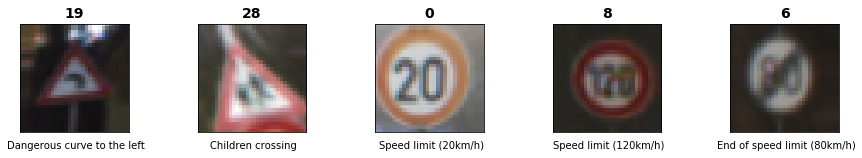

In [17]:
_ = plot_random_samples(X_train_augmented, y_train_augmented, from_index = len(X_train))

And the current distribution of the dataset:

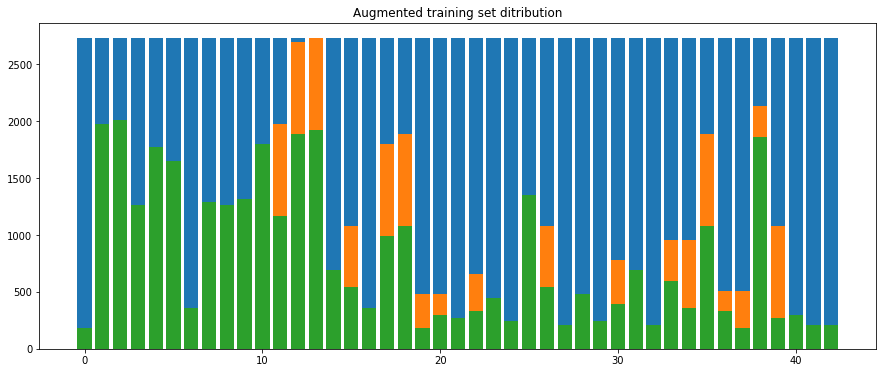

In [18]:
plot_distribution(y_train_augmented, 'Augmented training set ditribution', [y_train_mirrored, y_train])

We are now ready to build our final datasets, applying augmentation and preprocessing. Note that we need to preprocess all the datasets to get consistent results, while data augmentation can be applied only to the training set if we keep the validation and test sets distribution the same:

In [19]:
X_train_final, y_train_final = preprocess_data(X_train_augmented, y_train_augmented)
X_valid_final, y_valid_final = preprocess_data(X_valid, y_valid, shuffle_data = False)
X_test_final , y_test_final  = preprocess_data(X_test, y_test, shuffle_data = False)

Pre-processing: 100%|██████████| 12630/12630 [00:01<00:00, 11908.32 images/s]


### Model Architecture

Let us start defining some basic operations that we'll need to build the model and a base class that we use to build our models. In particular we implement a flexible class that allows us to try out several different techniques for improving our model. The following implements L2 regularization, batch normalization, flexible droput parameters for convolutional layer and fully connected layers and all the operations that we will later need to train, evaluate and use our model (e.g. run predictions):

In [30]:
import time
import tensorflow as tf
from tensorflow.contrib.layers import flatten

MODEL_DIR = 'models'
MODEL_EXT = '.ckpt'

if not os.path.isdir(MODEL_DIR):
    os.makedirs(MODEL_DIR)

class ConvNet:
    
    def __init__(self, model_name, cfg, n_classes, l2_reg = False, batch_normalize = False):
        '''
        Builds a ConvNet with the given name and configuration.
        
        Input:
            - model_name: name of the model
            - cfg: The configuration of the model, an array of steps where each step is an array such as:
                   Convolution    : ('C', output_ch, filter_size, padding_type, max_pooling)
                   Fully Connected: ('F', output_size)
                   Logits         : ('L', output_size)

                   Note that for the convolution layer the max_pooling defines the parameter k, if omitted no
                   max pooling is applied
            - n_classes: Number of output classes
            - l2_reg: Boolean, true if l2 regularization should be enabled
            - batch_normalize: Boolean, true if batch normalization should be applied to the fully connected layers
        '''
        self.mu = 0
        self.sigma = 0.1
        self.cfg = cfg
        self.l2_reg = l2_reg
        self.batch_normalize = batch_normalize
        self.model_name = model_name
        self.n_classes = n_classes
        self._init_placeholders()
        self.weights = []
        self.activations = []
        self.logits = self._build_model()
        self._init_operations()

    def _init_placeholders(self):
        self.features = tf.placeholder(tf.float32, (None, 32, 32, 3), name = 'features')
        self.labels = tf.placeholder(tf.int32, (None), name = 'labels')
        self.labels_encoded = tf.one_hot(self.labels, n_classes)
        self.learning_rate = tf.placeholder(tf.float32, name = 'learning_rate')
        # (1 - Dropout rate) for conv layers
        self.keep_prob_cv = tf.placeholder(tf.float32, name = 'keep_prob_cv')
        # (1 - Dropout rate) for fully connected layers
        self.keep_prob_fc = tf.placeholder(tf.float32, name = 'keep_prob_fc')
        # For batch normalization
        self.bn_decay = tf.placeholder(tf.float32, name = 'bn_decay')
        self.is_training = tf.placeholder(tf.bool, name ='is_training')
        self.l2_beta = tf.placeholder(tf.float32, name = 'l2_beta')
        
    def _init_operations(self):
        
        cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels = self.labels_encoded, logits = self.logits)
        self.loss = tf.reduce_mean(cross_entropy)
        
        regularizers = 0.0
        
        if self.l2_reg:
            
            for weight in self.weights:
                regularizers += tf.nn.l2_loss(weight)
            
            self.loss = tf.reduce_mean(self.loss + self.l2_beta * regularizers)
        
        # Keeps track of the training steps
        self.global_step = tf.Variable(0)
        
        update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
        
        # For batch normalization
        with tf.control_dependencies(update_ops):
            self.optimizer = tf.train.AdamOptimizer(learning_rate = self.learning_rate).minimize(self.loss, global_step = self.global_step)
        
        self.prediction = tf.argmax(self.logits, 1)
        correct_prediction = tf.equal(self.prediction, tf.argmax(self.labels_encoded, 1))
        self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        
    def _build_model(self):
        
        self.desc = []
        
        x = self.features
        
        for step in self.cfg:

            step_type  = step[0]
            
            input_shape = x.get_shape().as_list()
            
            input_size = input_shape[1] if len(input_shape) == 2 else input_shape[3]
            output_size = step[1]
            
            if step_type == 'C':
                
                filter_size = step[2]
                padding = step[3]
                
                w, b = self._weights_and_biases(input_size, output_size, filter_size)
                x = self._convolution_relu(x, w, b, padding = padding)
                desc = "Conv (Input: {}, {}@{}x{}, pad = {})".format(input_size, output_size, filter_size, filter_size, padding)
                
                if len(step) == 5:
                    x = self._max_pooling(x, k = step[4])
                    desc +=", Max Pooling ({})".format(step[4])
                    
                x = tf.nn.dropout(x, keep_prob = self.keep_prob_cv)
                self.desc.append(desc + ', Dropout')
                
                self.weights.append(w)
                self.activations.append(x)
                
            elif step_type == 'F':
                
                if not len(input_shape) == 2:
                    x = flatten(x)
                    input_size = x.get_shape().as_list()[1]
                    
                w, b = self._weights_and_biases(input_size, output_size)
                
                x = self._fully_connected(x, w, b)
                x = tf.nn.dropout(x, keep_prob = self.keep_prob_fc)
                
                self.desc.append("Fully Connected ({}x{}, Dropout)".format(input_size, output_size))
                
                self.weights.append(w)
                self.activations.append(x)
                
            elif step_type == 'L':
                
                w, b = self._weights_and_biases(input_size, output_size)              
                
                x = self._fully_connected(x, w, b, relu = False)
                
                self.desc.append("Out ({}x{})".format(input_size, output_size))
                self.weights.append(w)
                
                
        return x
        
    def _get_model_file(self, run_n):
        return os.path.join(MODEL_DIR, self.model_name + ('_' + str(run_n) if run_n > 0 else '') + MODEL_EXT)
    
    def _weights_and_biases(self, input_ch, output_ch, filter_size = None):
        shape = (input_ch, output_ch) if filter_size is None  else (filter_size, filter_size, input_ch, output_ch)

        w = tf.Variable(tf.truncated_normal(shape = shape, mean = self.mu, stddev = self.sigma))    
        b = tf.Variable(tf.zeros(output_ch))

        return w, b
    
    def _fully_connected(self, x, W, b, relu = True):
        x = tf.matmul(x, W)
        x = tf.nn.bias_add(x, b)
        if self.batch_normalize:
            # Unfortunately fused = True does not work with older version of tensorflow (e.g. 0.12.1)
            x = tf.contrib.layers.batch_norm(x, center = True, fused = False, decay = self.bn_decay, is_training = self.is_training)
        if relu:
            x = tf.nn.relu(x)
        return x

    def _convolution_relu(self, x, W, b, s = 1, padding = 'VALID'):
        x = tf.nn.conv2d(x, W, strides = [1, s, s, 1], padding = padding)
        x = tf.nn.bias_add(x, b)
        x = tf.nn.relu(x)
        return x

    def _max_pooling(self, x, k = 2, padding = 'VALID'):
        x = tf.nn.max_pool(x, ksize = [1, k, k, 1], strides = [1, k, k, 1], padding = padding)
        return x
    
    def summary(self):
        for step in self.desc:
            print(step)
        
    def train(self, params, restore = False):
        '''
        Runs the training on the model.
        
        Input:
            - params: A dictionary containing the hyper parameters for the training:
                run_n: The run number (e.g. number of experiment), used to save the model
                X: The train set input features
                y: The train set labels
                X_valid: The validation set input features
                y_valid: The validation set labels
                epochs: The number of epochs
                batch_size: The size of the mini batches
                learning_rate: The initial learning rate
                keep_prob_cv: The probability for the conv layers dropout
                keep_prob_fc: The probability for the fully connected layers dropout
                l2_beta: Beta for l2 regularization (if enabled)
                bn_decay: The decay for batch normalization (if enabled)
            - restore: Boolean, if true restores the model from the latest checkpoint
            
        Output:
            Training and validation log containing each an array of pairs (loss, accuracy) computed at each epoch
        '''
        # Unpack params
        run_n            = params['run_n']
        X                = params['X']
        y                = params['y']
        X_valid          = params['X_valid']
        y_valid          = params['y_valid']
        epochs           = params['epochs']
        batch_size       = params['batch_size']
        learn_rate       = params['learning_rate']
        keep_p_cv        = params['keep_prob_cv']
        keep_p_fc        = params['keep_prob_fc']
        l2_reg_beta      = params['l2_beta']
        batch_norm_decay = params['bn_decay']
        
        filepath         = self._get_model_file(run_n)

        # Used later on for plotting
        train_log = []
        valid_log = []

        saver = tf.train.Saver()

        with tf.Session() as sess:

            if restore:
                self.restore(params, sess)
            else:        
                sess.run(tf.global_variables_initializer())

            num_examples = len(X)

            print("Training {} #{}, {} samples (EP: {}, BS: {}, LR: {}, KP: {}, L2: {}, BN: {})...".format(
                self.model_name, run_n, num_examples, epochs, batch_size, learn_rate, 
                '({}, {})'.format(keep_p_cv, keep_p_fc),
                l2_reg_beta if self.l2_reg else 'OFF',
                batch_norm_decay if self.batch_normalize else 'OFF'
            ))
            print()

            start = time.time()

            for i in range(epochs):
                # Shuffle dataset on each epoch
                X, y = shuffle(X, y)

                start_ep = time.time()
                
                #offset_it = tqdm(range(0, num_examples, batch_size), unit = ' Batches', desc = 'EPOCH {}'.format(i + 1))
                
                for offset in range(0, num_examples, batch_size):
                    end = offset + batch_size

                    batch_x, batch_y = X[offset:end], y[offset:end]
                    
                    feed_dict = {
                        self.features: batch_x, 
                        self.labels: batch_y, 
                        self.learning_rate: learn_rate, 
                        self.keep_prob_cv: keep_p_cv,
                        self.keep_prob_fc: keep_p_fc,
                        self.l2_beta: l2_reg_beta,
                        self.bn_decay: batch_norm_decay,
                        self.is_training: True
                    }

                    _ = sess.run(self.optimizer, feed_dict = feed_dict)

                train_loss, train_acc = self.evaluate(X, y, params, sess)
                train_log.append([train_loss, train_acc])
                
                valid_loss, valid_acc = self.evaluate(X_valid, y_valid, params, sess)
                valid_log.append([valid_loss, valid_acc])

                elapsed_ep = time.time() - start_ep
                
                steps = sess.run(self.global_step)

                print("EPOCH {} ({:.1f} s, {}): Train Loss/Accuracy: ({:.4f}, {:.4f}) Validation Loss/Accuracy: ({:.4f}, {:.4f})".format(
                    i + 1, elapsed_ep, steps, train_loss, train_acc, valid_loss, valid_acc
                ))

            elapsed = time.time() - start
            print("Training finished ({:.1f} s)".format(elapsed))
            
            save_path = saver.save(sess, filepath)
            print("Model saved in path:", save_path)
            
            return np.array(train_log), np.array(valid_log)
        
    def restore(self, params, sess):
        '''
        Restores a model and returns a session
        '''
        saver = tf.train.Saver()
        run_n = params['run_n']
        saver.restore(sess, self._get_model_file(run_n))
        
    def evaluate(self, X, y, params, sess):
        '''
        Evaluates the model on the given dataset
        
        Input:
            - X: The input features
            - y: The labels
            - params: Dictionary containing the parameters for the model
                batch_size: The size of the minibatches
                l2_beta: Beta for l2 regularization (if enabled)
                bn_decay: The decay for batch normalization (if enabled)
        
        Output:
            (loss, accuracy) pair
        '''
        num_examples = len(X)
        
        batch_size       = params['batch_size']
        l2_reg_beta      = params['l2_beta']
        batch_norm_decay = params['bn_decay']
        
        total_loss = 0
        total_accuracy = 0
            
        for offset in range(0, num_examples, batch_size):

            batch_x, batch_y = X[offset:offset + batch_size], y[offset:offset + batch_size]

            feed_dict = {
                self.features: batch_x,
                self.labels: batch_y,
                self.keep_prob_cv: 1,
                self.keep_prob_fc: 1,
                self.l2_beta: l2_reg_beta,
                self.bn_decay: batch_norm_decay,
                self.is_training: False
            }
            
            loss, accuracy = sess.run([self.loss, self.accuracy], feed_dict = feed_dict)

            total_loss += (loss * len(batch_x))
            total_accuracy += (accuracy * len(batch_x))

        return total_loss / num_examples, total_accuracy / num_examples
        
    def predict(self, X, params, sess):
        
        l2_reg_beta      = params['l2_beta']
        batch_norm_decay = params['bn_decay']
            
        feed_dict = {
            self.features: X,
            self.keep_prob_cv: 1,
            self.keep_prob_fc: 1,
            self.l2_beta: l2_reg_beta,
            self.bn_decay: batch_norm_decay,
            self.is_training: False
        }
        
        prob, pred = sess.run([tf.nn.softmax(self.logits), self.prediction], feed_dict = feed_dict)
        
        return pred, prob
        

### Final Model

In the following we define our final model, choosen after several hours of experimentation and fine tuning. The model follows after the VGG architecture, having multiple convolutions with maxpooling and dropout and finally using a fully connected layer:

In [ ]:
def VGGLikeNetV8(l2_reg = False, batch_normalize = False):
    '''
    Input: 32x32x3
    -> Conv (3x3x32  pad = SAME)
    -> Conv (3x3x32  pad = SAME), MaxPooling
    -> Conv (3x3x64  pad = SAME)
    -> Conv (3x3x64  pad = SAME), MaxPooling
    -> Conv (3x3x128 pad = SAME)
    -> Conv (3x3x128 pad = SAME), MaxPooling, Flatten
    -> FC   (2048x512)          , Dropout
    -> FC   (256x43)
    '''
    cfg = [('C',  32, 3, 'SAME'),    # 32x32x32
           ('C',  32, 3, 'SAME', 2), # 16x16x32
           ('C',  64, 3, 'SAME'),    # 16x16x64
           ('C',  64, 3, 'SAME', 2), # 8x8x64
           ('C', 128, 3, 'SAME'),    # 8x8x128
           ('C', 128, 3, 'SAME', 2), # 4x4x128
           ('F', 512),
           ('L', n_classes)]
    
    return ConvNet('VGGLikeNetV8', cfg, n_classes, l2_reg = l2_reg, batch_normalize = batch_normalize)

model = VGGLikeNetV8(True, True)
model.summary()

In the following we include a visual representation of the choosen model:

![VGGLikeNetV8 Architecture](images/model_architecture.png)

### Other Architectures

In the following we provide additional models that we tried during the experimentation and fine tuning, in particular I started from the LeNet based architecture and built on top of it. Later on I decided to try and switch to a VGG oriented architecture, and peformed several experiments to find the best fitting layer architecture. I implemented an adapted version of VGG13 but found it was too slow with the resources at my disposal, so I removed one layer. Finally I implemented the final model removing one of the fully connected layers that proved to perform better:

In [21]:
# Base LeNet architecture
def LeNet(l2_reg = False, batch_normalize = False):
    '''
    Input: 32x32x3
    -> Conv (5x5x6  pad = VALID), MaxPooling          
    -> Conv (5x5x16 pad = VALID), MaxPooling, Flatten
    -> FC   (400x120)           , Dropout
    -> FC   (120x84)            , Dropout
    -> FC   (84x43)
    '''
    cfg = [('C',   6, 5, 'VALID', 2), # 14x14x6
           ('C',  16, 5, 'VALID', 2), # 5x5x16
           ('F', 120),
           ('F',  84),
           ('L', n_classes)]
    
    return ConvNet('LeNet', cfg, n_classes)        

# A modification of LeNet, deeper that yield better results
def LeNetMod(l2_reg = False, batch_normalize = False):
    '''
    Input: 32x32x3
    -> Conv (3x3x32  pad = VALID), MaxPooling
    -> Conv (3x3x64  pad = VALID), MaxPooling
    -> Conv (3x3x128 pad = VALID), MaxPooling, Flatten
    -> FC   (512x512)            , Dropout
    -> FC   (512x256)            , Dropout
    -> FC   (256x43)
    '''
    cfg = [('C',  32, 3, 'VALID', 2), # 15x15x32
           ('C',  64, 3, 'VALID', 2), # 6x6x64
           ('C', 128, 3, 'VALID', 2), # 2x2x128
           ('F', 512),
           ('F', 256),
           ('L', n_classes)]
    
    return ConvNet('LeNetMod', cfg, n_classes, l2_reg = l2_reg, batch_normalize = batch_normalize)

# First try with a VGG like architecture
def VGGLikeNet(l2_reg = False, batch_normalize = False):
    '''
    Input: 32x32x3
    -> Conv (3x3x32  pad = VALID)
    -> Conv (3x3x32  pad = VALID), MaxPooling
    -> Conv (3x3x64  pad = VALID)
    -> Conv (3x3x64  pad = VALID), MaxPooling
    -> Conv (3x3x128 pad = VALID), Flatten
    -> FC   (1152x512)           , Dropout
    -> FC   (512x256)            , Dropout
    -> FC   (256x43)
    '''
    cfg = [('C',  32, 3, 'VALID'),    # 30x30x32
           ('C',  32, 3, 'VALID', 2), # 14x14x32
           ('C',  64, 3, 'VALID'),    # 12x12x64
           ('C',  64, 3, 'VALID', 2), # 5x5x64
           ('C', 128, 3, 'VALID'),    # 3x3x128
           ('F', 512),
           ('F', 256),
           ('L', n_classes)]
    
    return ConvNet('VGGLikeNet', cfg, n_classes, l2_reg = l2_reg, batch_normalize = batch_normalize)

# Try with a very close version of VGG 13
def VGGLikeNetV2(l2_reg = False, batch_normalize = False):
    '''
    Input: 32x32x3
    -> Conv (3x3x32  pad = SAME)
    -> Conv (3x3x32  pad = SAME), MaxPooling
    -> Conv (3x3x64  pad = SAME)
    -> Conv (3x3x64  pad = SAME), MaxPooling
    -> Conv (3x3x128 pad = SAME)
    -> Conv (3x3x128 pad = SAME), MaxPooling
    -> Conv (3x3x256 pad = SAME)
    -> Conv (3x3x256 pad = SAME), MaxPooling, Flatten
    -> FC   (1024x512)          , Dropout
    -> FC   (512x512)           , Dropout
    -> FC   (512x43)
    '''
    cfg = [('C',   32, 3, 'SAME'),    # 32x32x32
           ('C',   32, 3, 'SAME', 2), # 16x16x32
           ('C',   64, 3, 'SAME'),    # 16x16x32
           ('C',   64, 3, 'SAME', 2), # 8x8x32
           ('C',  128, 3, 'SAME'),    # 8x8x128
           ('C',  128, 3, 'SAME', 2), # 4x4x128
           ('C',  256, 3, 'SAME'),    # 4x4x256
           ('C',  256, 3, 'SAME', 2), # 2x2x256
           ('F',  512),
           ('F',  512),
           ('L',  n_classes)]
    
    return ConvNet('VGGLikeNetV2', cfg, n_classes, l2_reg = l2_reg, batch_normalize = batch_normalize)

# Removes one layer from the version V2, to speed up training
def VGGLikeNetV6(l2_reg = False, batch_normalize = False):
    '''
    Input: 32x32x3
    -> Conv (3x3x32  pad = SAME)
    -> Conv (3x3x32  pad = SAME), MaxPooling
    -> Conv (3x3x64  pad = SAME)
    -> Conv (3x3x64  pad = SAME), MaxPooling
    -> Conv (3x3x128 pad = SAME)
    -> Conv (3x3x128 pad = SAME), MaxPooling, Flatten
    -> FC   (2048x512)          , Dropout
    -> FC   (512x256)           , Dropout
    -> FC   (256x43)
    '''
    cfg = [('C',  32, 3, 'SAME'),    # 32x32x32
           ('C',  32, 3, 'SAME', 2), # 16x16x32
           ('C',  64, 3, 'SAME'),    # 16x16x64
           ('C',  64, 3, 'SAME', 2), # 8x8x64
           ('C', 128, 3, 'SAME'),    # 8x8x128
           ('C', 128, 3, 'SAME', 2), # 4x4x128
           ('F', 512),
           ('F', 256),
           ('L', n_classes)]
    
    return ConvNet('VGGLikeNetV6', cfg, n_classes, l2_reg = l2_reg, batch_normalize = batch_normalize)

### Summary of architectures:

In the following table we provide an overall summary of the main architectures that were tested during the experimentation. Note that other architectures were tested, in particular trying different sizes for the convolutions and fully connected layers, these are the ones that were focused on during the last part of the experimentation:

![Models](images/models.png)

Note that while in the initial testing no padding was used, later on after adding new layers in order to preserve information on the border of the images zero padding was introduced.

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In the following we provide prepare an environment where we can run multiple experiments and then plot the results, in particular we plot the loss and accuracy during the training for both the training and validation datasets, this helps us understand how the model is doing in respect to the hyperparameters and allows us to better fine tune the model:

In [22]:
def plot_results(model, params, train_log, valid_log, test_loss, test_acc, save = True):
    
    model_name       = model.model_name
    run_n            = params['run_n']
    epochs           = params['epochs']
    batch_size       = params['batch_size']
    learning_rate    = params['learning_rate']
    keep_prob_cv     = params['keep_prob_cv']
    keep_prob_fc     = params['keep_prob_fc']
    l2_beta          = params['l2_beta']
    bn_decay         = params['bn_decay']

    # Get the training and validation loss/accuracy
    train_loss, train_acc = train_log[-1:][0]
    valid_loss, valid_acc = valid_log[-1:][0]
    
    text = 'Loss: {:.3f}, {:.3f}, {:.3f} - Accuracy: {:.3f}, {:.3f}, {:.3f}'.format(
        train_loss, valid_loss, test_loss,
        train_acc, valid_acc, test_acc)

    print(text)
    
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    
    c1 = colors[0]
    c2 = colors[1]
    c3 = colors[2]
    c4 = colors[3]
    
    fig, ax1 = plt.subplots(figsize=(9, 6))
    
    ax1.set_xlabel('Epochs')
    
    x = np.arange(1, len(train_log) + 1)
    
    ax1.plot(x, train_log[:,0], label='Train Loss', color = c1)
    ax1.plot(x, valid_log[:,0], label='Validation Loss', color = c2)
    
    # Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_ylabel('Loss', color = c1)
    ax1.tick_params('y', colors = c1)

    ax2 = ax1.twinx()
   
    ax2.plot(train_log[:,1], label='Train Accuracy', color = c3)
    ax2.plot(valid_log[:,1], label='Validation Accuracy', color = c4)
    
    ax2.set_ylabel('Accuracy', color = c3)
    ax2.tick_params('y', colors = c3)

    plt.title("{} (EP: {}, BS: {}, LR: {}, KP: {}, L2: {}, BN: {})".format(
        model_name, epochs, batch_size, learning_rate, 
        '({}, {})'.format(keep_prob_cv, keep_prob_fc),
        l2_beta if model.l2_reg else 'OFF',
        bn_decay if model.batch_normalize else 'OFF'
    ))
    
    fig.text(0.5, 0, text,
                verticalalignment='top', 
                horizontalalignment='center',
                color='black', fontsize=10)
    
    
    handles, labels = ax1.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    
    fig.legend(handles2 + handles, labels2 + labels, loc = (0.7, 0.5))
    fig.tight_layout()
    
    if save:
        fig.savefig(os.path.join(MODEL_DIR, model_name + ('_' + str(run_n) if run_n > 0 else '')), bbox_inches = 'tight')
    
    plt.show()
    
def run_experiments(experiments):
    
    results = []
    
    for exp_params in experiments:

        if exp_params['skip']:
            continue

        exp_model = exp_params['model']

        exp_l2_reg = exp_params['l2_reg']
        exp_batch_normalize = exp_params['batch_normalize']

        tf.reset_default_graph()

        exp_model = exp_model(l2_reg = exp_l2_reg, batch_normalize = exp_batch_normalize)

        # Train the model
        exp_train_log, exp_valid_log = exp_model.train(exp_params)
        
        # Evaluate
        with tf.Session() as sess:
            exp_model.restore(exp_params, sess)
            exp_test_loss, exp_test_acc = exp_model.evaluate(X_test_final, y_test_final, exp_params, sess)

            results.append([exp_model, exp_train_log, exp_valid_log, exp_test_loss, exp_test_acc])

            plot_results(exp_model, exp_params, exp_train_log, exp_valid_log, exp_test_loss, exp_test_acc)
    
    return results

In the cell below we define the experiments parameters, for brevity we only include here the final model parameters that we will use for testing and analyzing later on:

In [44]:
experiments = [
    {
        'run_n'           : 8,
        'model'           : VGGLikeNetV8,
        'l2_reg'          : True,
        'batch_normalize' : True,
        'X'               : X_train_final,
        'y'               : y_train_final,
        'X_valid'         : X_valid_final,
        'y_valid'         : y_valid_final,
        'epochs'          : 40,
        'batch_size'      : 128,
        'learning_rate'   : 0.00025,
        'keep_prob_cv'    : 1.0,
        'keep_prob_fc'    : 0.5,
        'l2_beta'         : 0.0001,
        'bn_decay'        : 0.9,
        'skip'            : False
    }
]

Training VGGLikeNetV8 #8, 117390 samples (EP: 40, BS: 128, LR: 0.00025, KP: (1.0, 0.5), L2: 0.0001, BN: 0.9)...

EPOCH 1 (52.4 s, 918): Train Loss/Accuracy: (1.1464, 0.9543) Validation Loss/Accuracy: (1.2390, 0.9236)
EPOCH 2 (52.2 s, 1836): Train Loss/Accuracy: (0.7747, 0.9880) Validation Loss/Accuracy: (0.8699, 0.9689)
EPOCH 3 (52.4 s, 2754): Train Loss/Accuracy: (0.6032, 0.9959) Validation Loss/Accuracy: (0.6838, 0.9814)
EPOCH 4 (52.4 s, 3672): Train Loss/Accuracy: (0.4833, 0.9981) Validation Loss/Accuracy: (0.5690, 0.9828)
EPOCH 5 (52.5 s, 4590): Train Loss/Accuracy: (0.4051, 0.9992) Validation Loss/Accuracy: (0.4802, 0.9844)
EPOCH 6 (52.7 s, 5508): Train Loss/Accuracy: (0.3327, 0.9993) Validation Loss/Accuracy: (0.4204, 0.9832)
EPOCH 7 (52.6 s, 6426): Train Loss/Accuracy: (0.2787, 0.9997) Validation Loss/Accuracy: (0.3662, 0.9839)
EPOCH 8 (52.5 s, 7344): Train Loss/Accuracy: (0.2373, 0.9999) Validation Loss/Accuracy: (0.3170, 0.9871)
EPOCH 9 (52.5 s, 8262): Train Loss/Accuracy: (0.

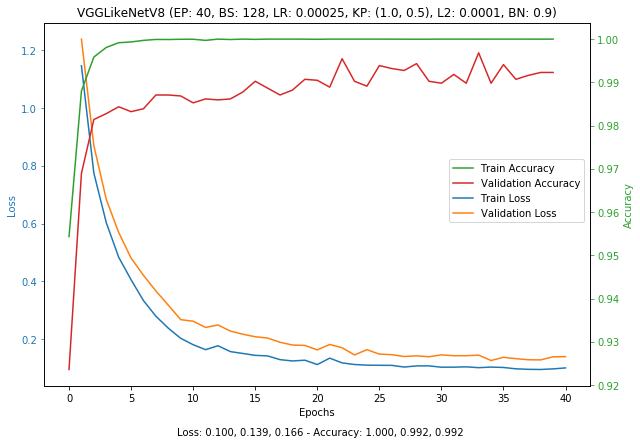

In [45]:
results = run_experiments(experiments)

Let us save the results and load the final model:

In [47]:
def save_results(train_log, valid_log, filename = 'models/final_results.p'):
    results = {
        'train': train_log,
        'valid': valid_log
    }
    with open(filename, 'wb') as f:   
        pickle.dump(results, f, protocol = pickle.HIGHEST_PROTOCOL)
        
def load_results(filename = 'models/final_results.p'):
    with open(filename, 'rb') as f:
        results = pickle.load(f)

    train_log, valid_log = results['train'], results['valid']
    return train_log, valid_log

if len(results) > 0:
    final_model, final_train_log, final_valid_log, final_test_loss, final_test_acc = results[0]
    save_results(final_train_log, final_valid_log)

INFO:tensorflow:Restoring parameters from models/VGGLikeNetV8_8.ckpt
Loss: 0.100, 0.139, 0.166 - Accuracy: 1.000, 0.992, 0.992


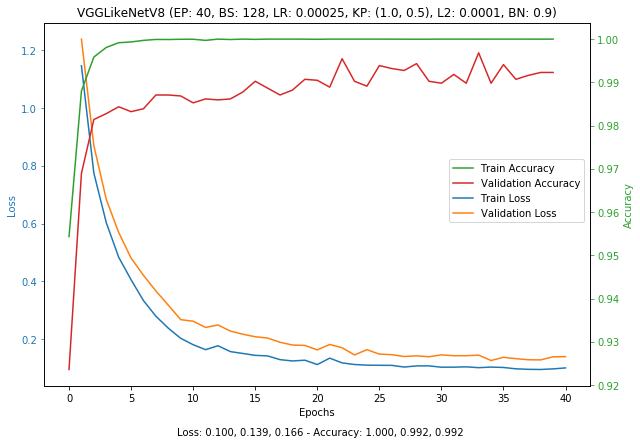

In [48]:
final_params = experiments[0]

if os.path.isfile('models/final_results.p'):
    final_train_log, final_valid_log = load_results()
    final_model = final_params['model']

    tf.reset_default_graph()

    final_model = final_model(l2_reg = final_params['l2_reg'], batch_normalize = final_params['batch_normalize'])

    with tf.Session() as sess:
        final_model.restore(final_params, sess)
        final_test_loss, final_test_acc = final_model.evaluate(X_test_final, y_test_final, final_params, sess)
        plot_results(final_model, final_params, final_train_log, final_valid_log, final_test_loss, final_test_acc)
    
elif len(results) == 0:
    print('Could not load the results from file and no experiment was run')

### Experiments

In the following section we provide a summary of the more relevant experiments that were conducted during the project:

#### Preliminary Experimentation (original dataset)

Initially I started out with the LeNet architecture and tested various normalization techniques and preprocessing, in particular I used min-max normalization and the histogram equalizer, using normal and CLAHE.

For all the experiments I used a batch size of 128 and a learning rate of 0.001 and few epochs (12).

This allowed me to settle for the on a min-max normalization between -0.5 and 0.5, I also decided to use the CLAHE histogram equalizer as they provided better results.

#### Initial data augmentation

I then proceeded with a first implementation of simple data augmentation and experiments with different parameters, in particular I experimented using the LeNet architecture, a modified version of LeNet and a VGG resembling version.

In this first version I implemeted dropout for the fully connected layers only and no regularization or batch normalization was introduced yet.

| Name       | # | EP | BS  | LR     | KP  | Accuracy (Train/Validation/Testing |
|------------|---|----|-----|--------|-----|------------------------------------|
| LeNet      | 1 | 10 | 64  | 0.001  | 1.0 | 0.990 / 0.944 / 0.567              |
| LeNet      | 2 | 20 | 128 | 0001   | 1.0 | 0.994 / 0.938 / 0.939              |
| LeNet      | 3 | 30 | 128 | 0.0001 | 1.0 | 0.956 / 0.910 / 0.902              |
| LeNetMod   | 1 | 20 | 128 | 0.0001 | 1.0 | 0.998 / 0.943 / 0.940              |
| LeNetMod   | 2 | 20 | 128 | 0.0001 | 0.7 | 0.997 / 0.967 / 0.964              |
| LeNetMod   | 3 | 20 | 128 | 0.0001 | 0.5 | 0.992 / 0.973 / 0.965              |
| VGGLikeNet | 1 | 20 | 128 | 0.0001 | 0.7 | 0.999 / 0.973 / 0.968              |
| VGGLikeNet | 2 | 20 | 128 | 0.0001 | 0.5 | 0.999 / 0.983 / 0.977              |
| VGGLikeNet | 3 | 20 | 512 | 0.0001 | 0.5 | 0.988 / 0.968 / 0.963              |

In particular I got down to a 0.0001 learning rate and a dropout probability of 0.5 in the fully connected layers.

#### Better augmentation

I then decided to go back and check my data augmentation and check if I could do better, I added the mirroring of images horizontally and better augmentation techniques such as scaling and perspective modification as well as brightness perturbation. I also implemented L2 regularization and batch normalization. The latter was giving good results but it is computationally very expensive:

| Name       | # | EP | BS  | LR     | KP  | L2     | BN  | Accuracy (Train/Validation/Testing |
|------------|---|----|-----|--------|-----|--------|-----|------------------------------------|
| LeNetMod   | 1 | 20 | 128 | 0.0001 | 0.5 | OFF    | OFF | 0.997 / 0.979 / 0.971              |
| LeNetMod   | 2 | 20 | 128 | 0.0001 | 0.5 | 0.01   | OFF | 0.984 / 0.973 / 0.952              |
| LeNetMod   | 3 | 20 | 128 | 0.0001 | 0.5 | 0.001  | OFF | 0.999 / 0.981 / 0.975              |
| VGGLikeNet | 1 | 20 | 128 | 0.0001 | 0.5 | OFF    | OFF | 0.999 / 0.984 / 0.980              |
| VGGLikeNet | 2 | 35 | 128 | 0.0001 | 0.5 | 0.001  | OFF | 0.999 / 0.984 / 0.982              |
| VGGLikeNet | 3 | 40 | 128 | 0.0001 | 0.5 | 0.0001 | OFF | 1.000 / 0.989 / 0.980              |
| VGGLikeNet | 4 | 40 | 128 | 0.0001 | 0.5 | OFF    | 0.9 | 1.000 / 0.983 / 0.980              |
| VGGLikeNet | 5 | 50 | 128 | 0.0001 | 0.5 | 0.0001 | 0.9 | 1.000 / 0.990 / 0.985              |

#### Final Experimentation

I then decided to try out different layer sizes and architectures and pushed to the final results, at this stage I also added the dropout after the convolutional layers, but I decided not to use it in the end as the the number of epochs needed to train were becoming too many for the computational resources that I had available:

| Name         | #  | EP | BS  | LR      | KP        | L2     | BN   | Accuracy (Train/Validation/Testing |
|--------------|----|----|-----|---------|-----------|--------|------|------------------------------------|
| VGGLikeNet   | 1  | 20 | 128 | 0.0001  | (1.0,0.5) | 0.0001 | 0.9  | 1.000 / 0.988 / 0.985              |
| VGGLikeNetV2 | 1  | 20 | 128 | 0.0001  | (1.0,0.5) | OFF    | OFF  | 0.998 / 0.975 / 0.965              |
| VGGLikeNetV2 | 2  | 20 | 128 | 0.0001  | (1.0,0.5) | 0.0001 | 0.9  | 0.996 / 0.986 / 0.989              |
| VGGLikeNetV6 | 1  | 20 | 128 | 0.0001  | (1.0,0.5) | OFF    | OFF  | 0.999 / 0.981 / 0.975              |
| VGGLikeNetV6 | 3  | 20 | 128 | 0.0001  | (1.0,0.5) | 0.0001 | 0.9  | 1.000 / 0.984 / 0.988              |
| VGGLikeNetV6 | 4  | 20 | 128 | 0.0001  | (1.0,0.5) | 0.0005 | 0.9  | 1.000 / 0.985 / 0.984              |
| VGGLikeNetV6 | 6  | 20 | 128 | 0.0001  | (0.7,0.5) | 0.0001 | 0.9  | 0.989 / 0.978 / 0.964              |
| VGGLikeNetV6 | 7  | 20 | 128 | 0.0001  | (1.0,0.5) | 0.0001 | 0.99 | 1.000 / 0.986 / 0.986              |
| VGGLikeNetV6 | 9  | 30 | 128 | 0.0001  | (0.9,0.5) | 0.0001 | 0.99 | 1.000 / 0.986 / 0.984              |
| VGGLikeNetV6 | 10 | 30 | 128 | 0.0005  | (1.0,0.5) | 0.0001 | 0.9  | 1.000 / 0.998 / 0.990              |
| VGGLikeNetV6 | 14 | 40 | 128 | 0.0003  | (1.0,0.5) | 0.0001 | 0.9  | 1.000 / 0.991 / 0.991              |
| VGGLikeNetV8 | 1  | 20 | 128 | 0.0001  | (1.0,0.5) | 0.0001 | 0.9  | 1.000 / 0.987 / 0.989              |
| VGGLikeNetV8 | 2  | 30 | 128 | 0.0001  | (1.0,0.5) | 0.0008 | 0.99 | 1.000 / 0.985 / 0.987              |
| VGGLikeNetV8 | 3  | 30 | 128 | 0.0001  | (1.0,0.5) | 0.0008 | 0.9  | 1.000 / 0.990 / 0.987              |
| VGGLikeNetV8 | 4  | 30 | 128 | 0.0002  | (1.0,0.5) | 0.0001 | 0.9  | 1.000 / 0.988 / 0.988              |
| VGGLikeNetV8 | 5  | 40 | 128 | 0.0003  | (1.0,0.5) | 0.0001 | 0.9  | 1.000 / 0.997 / 0.993              |
| VGGLikeNetV8 | 6  | 50 | 128 | 0.0001  | (1.0,0.5) | 0.0001 | 0.9  | 1.000 / 0.988 / 0.991              |
| VGGLikeNetV8 | 7  | 30 | 128 | 0.00025 | (1.0,0.5) | 0.0001 | 0.9  | 1.000 / 0.992 / 0.990              |
| VGGLikeNetV8 | 8  | 40 | 128 | 0.00025 | (1.0,0.5) | 0.0001 | 0.9  |               |

Note that several experiments were interrupted while running when it was clear it was not going into the right direction. Note also that for the VGGLikeNetV6 at some point (run number 10) increasing the learning rate got me a very high accuracy, see the image below:

![VGGLikeNetV6](images/VGGLikeNetV6_10.png)

It may indicate that the adam optimizer is doing somehow its job but it would probably need many more epochs to stabilize.

In the following I include several images captured during training with various architectures and parameters, it was important to see how the loss and accuracy would decrease/increase to evaluate the model:


This was LeNet, it was clear that the learning rate was too high:
![LeNet](images/LeNet_1.png)

One of the modifications of LeNet (without L2 or batch norm):
![LeNetMod](images/LeNetMod_1.png)


First implementation of the VGG like architectures (with L2 and batch norm):
![VGGLikeNet](images/VGGLikeNet_2.png)

Implementation of the VGG 13 architecture (Note that the training loss and accuracy are not correct in this graph due to a minor implementation mistake):
![VGGLikeNetV2](images/VGGLikeNetV2_2.png)

One of the final models (with L2 and batch norm):
![VGGLikeNetV6](images/VGGLikeNetV6_3.png)

The final model trained on many epochs:
![VGGLikeNetV8](images/VGGLikeNetV8_6.png)

The final model trained with a higher learning rate:
![VGGLikeNetV8](images/VGGLikeNetV8_5.png)


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

A few testing images that we downloaded from internet, includes images that were underepresented in the original dataset:

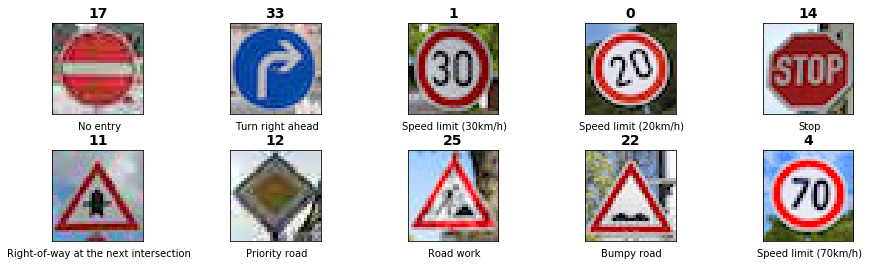

In [56]:
import matplotlib.image as mpimg

def load_test_images(input_folder = 'test_images'):
    X = []
    y = []
    for file in os.listdir('test_images'):
        if file.endswith('.jpg'):
            X.append(mpimg.imread(os.path.join(input_folder, file)))
            y.append(int(file[:-4]))
            
    return X, y

X_ext, y_ext = load_test_images()

plot_images(X_ext, y_ext)

### Predict the Sign Type for Each Image

We can run now our model on the testing images and see how it behaves.

Our final model that will be used in the following is the VGGLikeNetV8 trained on 40 epochs with the following parameters:

- Epochs: 40
- Batch size: 128
- Learning rate: 0.00025
- Dropout probability (Fully connected): 0.5
- Dropout probability (Convolutions): 0
- L2 Beta: 0.0001
- Batch Norm Decay: 0.9

The accuracy of the model was as follow:

- Training: 1.0
- Validation: 0.992
- Testing: 0.992

Let us now see how it behaves on the new images:

Pre-processing: 100%|██████████| 10/10 [00:00<00:00, 1288.37 images/s]

INFO:tensorflow:Restoring parameters from models/VGGLikeNetV8_8.ckpt


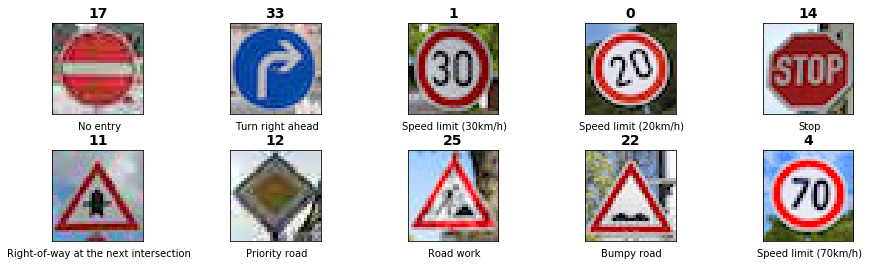

In [57]:
tf.reset_default_graph()

# Parameters of the final model
model_final_params = {
    'run_n'           : 8,
    'model'           : VGGLikeNetV8,
    'l2_reg'          : True,
    'batch_normalize' : True,
    'epochs'          : 40,
    'batch_size'      : 128,
    'learning_rate'   : 0.00025,
    'keep_prob_cv'    : 1.0,
    'keep_prob_fc'    : 0.5,
    'l2_beta'         : 0.0001,
    'bn_decay'        : 0.9,
    'skip'            : False
}

model_final = model_final_params['model'](True, True)

X_ext_processed, y_ext_processed = preprocess_data(X_ext, y_ext, shuffle_data = False)

def compute_predictions(model, X, params):
    with tf.Session() as sess:
        model.restore(params, sess)
        pred, prob = model.predict(X, params, sess)
        return pred, prob

pred, prob = compute_predictions(model_final, X_ext_processed, model_final_params)

plot_images(X_ext, pred)

The predictions are shown on top of each image, looks like it got all the images right, even the 20km/h speed limit which was underepresented in the original dataset and in this image is also rotated. This may mean that the model is generalizing well.

### Analyze Performance

In [58]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

def compute_accuracy(model, X, y, params):
    with tf.Session() as sess:
        model.restore(params, sess)
        loss, acc = model.evaluate(X, y, params, sess)
        return loss, acc

loss, acc = compute_accuracy(model_final, X_ext_processed, y_ext_processed, model_final_params)

print("Accuracy of the model on the new images:", acc)

INFO:tensorflow:Restoring parameters from models/VGGLikeNetV8_8.ckpt
Accuracy of the model on the new images: 1.0


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

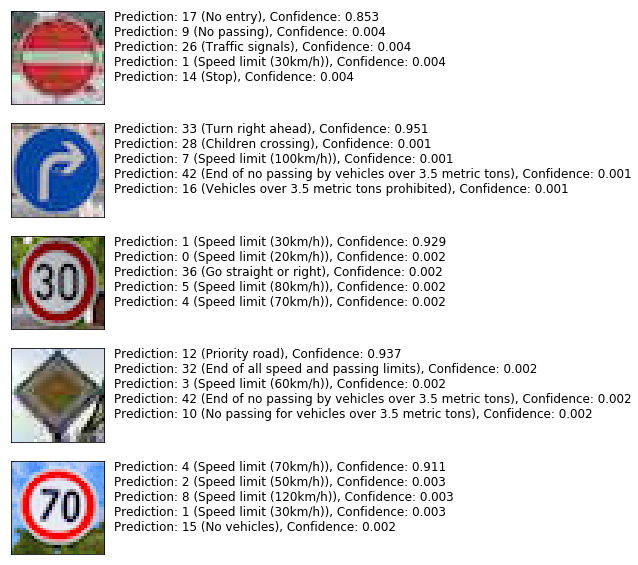

In [404]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

def compute_top_k(prob):
    with tf.Session() as sess:
        return sess.run(tf.nn.top_k(prob, k = 5))

# prob was computed in the previous cell for the predictions
top_k = compute_top_k(prob)


plt.figure(figsize = (10, 10))

for i, img in enumerate(X_ext):
    indices = top_k.indices[i]
    values = top_k.values[i]
    ax = plt.subplot(5, 1, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
    
    text = ''
    
    for j, idx in enumerate(indices):
        
        
        sign = labels_map[idx][0]
        sign_label = labels_map[idx][1]
        sign_p = values[j]
        
        text += "Prediction: {} ({}), Confidence: {:.3f}\n".format(sign, sign_label, sign_p)
        
    plt.text(1.1, 1, text, horizontalalignment='left', verticalalignment='top', fontsize = 12, transform=ax.transAxes)
    


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [344]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(tf_activation, feed_dict, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess, feed_dict=feed_dict)
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

INFO:tensorflow:Restoring parameters from models/VGGLikeNetV6_9.ckpt


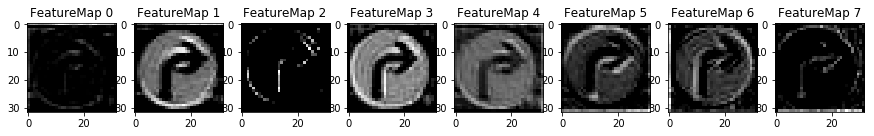

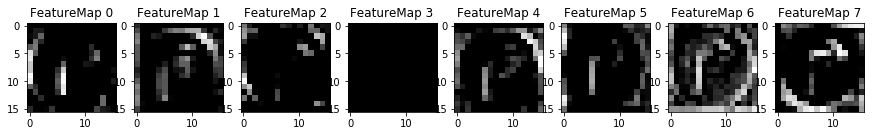

In [414]:
with tf.Session() as sess:
    img = X_ext[1]
    model_final.restore(model_final_params, sess)
        
    feed_dict ={
        model_final.features: [img],
        model_final.keep_prob_cv: 1,
        model_final.keep_prob_fc: 1,
        model_final.l2_beta: model_final_params['l2_beta'],
        model_final.bn_decay: model_final_params['bn_decay'],
        model_final.is_training: False
    }
    
    x = model_final.features 
    for i, a in enumerate(model_final.activations[:2]):
        outputFeatureMap(a[:, :, :, :8], feed_dict, activation_min=-1, activation_max=-1 , plt_num=i+1)